# Week 4: NLP Disaster Tweets Kaggle Mini-Project

## Brief Description of the Problem and Data (5 pts)

The challenge is to build a model that can predict which tweets are about real disasters and which ones are not. This binary classification problem involves natural language processing (NLP) to analyze the text of tweets.

Data Overview:

- Training data: 7503 tweets with labels (1 for disaster-related and 0 for non-disaster)
- Test data: 3243 tweets without labels
- Features:
    - id: Unique identifier for each tweet
    - text: The content of the tweet
    - location: The location where the tweet was posted (may be missing)
    - keyword: A keyword from the tweet (may be missing)
    - target: The label (1 for disaster, 0 for non-disaster)

## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

2024-07-18 14:02:44.404173: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv('./nlp-getting-started/train.csv')
test = pd.read_csv('./nlp-getting-started/test.csv')

In [3]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

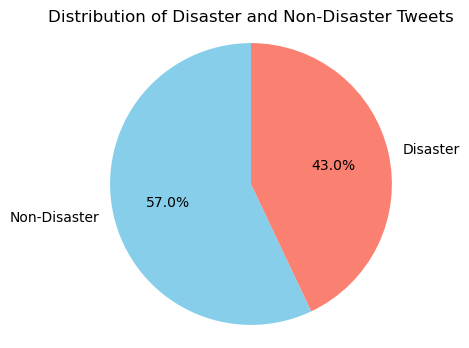

In [7]:
target_counts = train['target'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(target_counts, labels=['Non-Disaster', 'Disaster'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Disaster and Non-Disaster Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

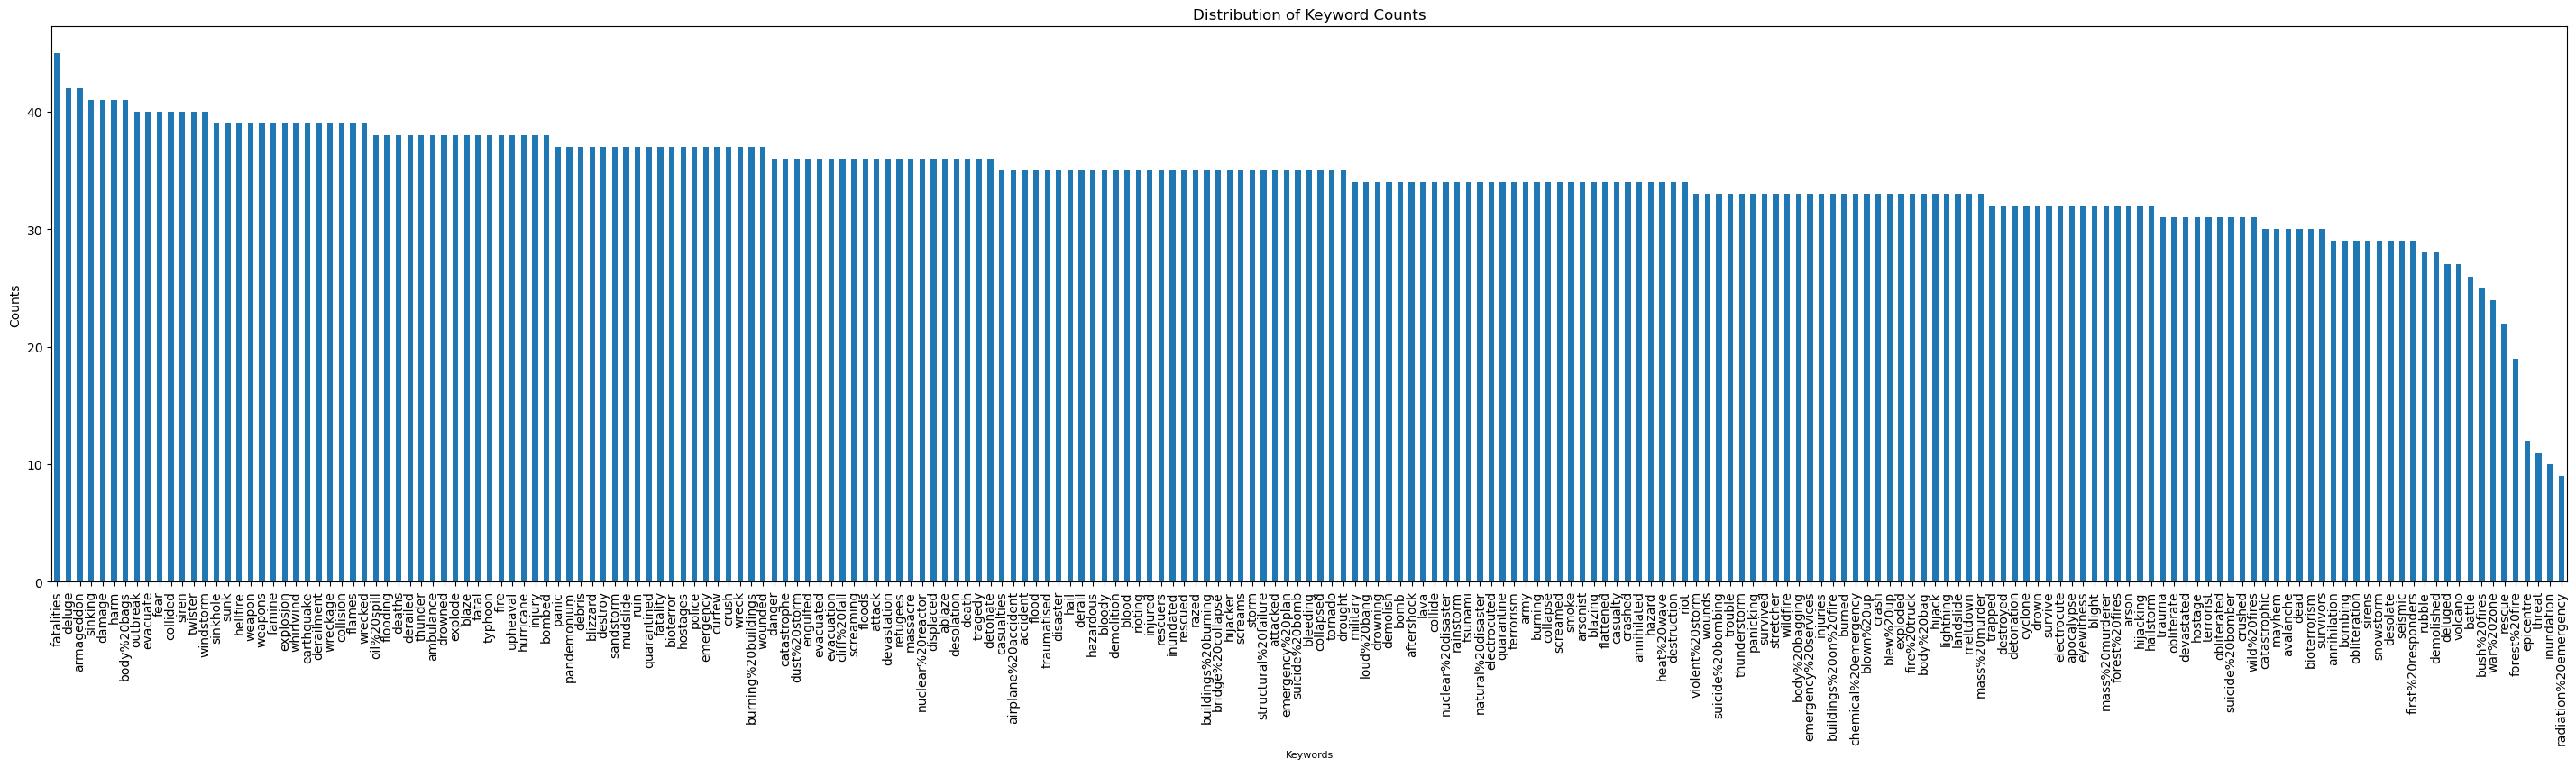

In [8]:
keyword_counts = train['keyword'].value_counts()
plt.figure(figsize=(36, 8))
keyword_counts.plot(kind='bar')
plt.title('Distribution of Keyword Counts')
plt.xlabel('Keywords', fontsize=8)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [9]:
keyword_counts.head()

keyword
fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
Name: count, dtype: int64

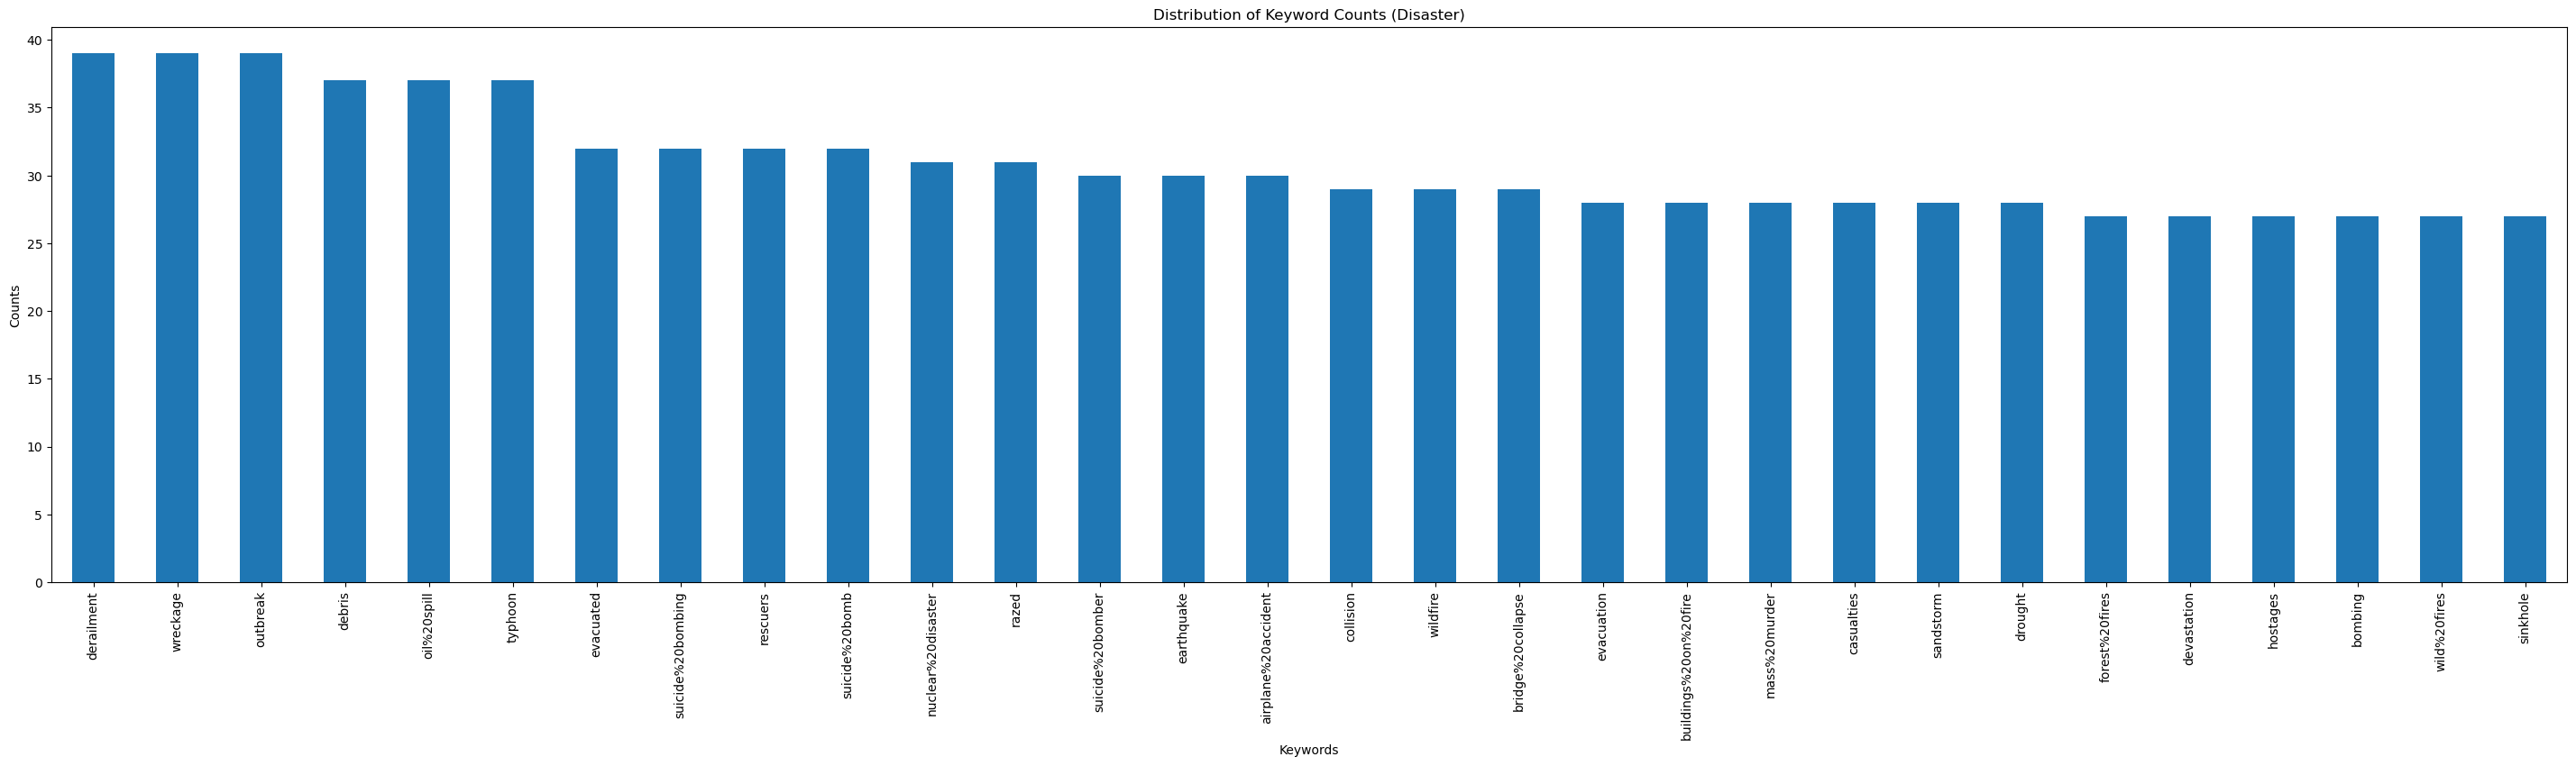

In [10]:
disaster_tweets = train[train['target'] == 1]
target_counts = disaster_tweets['keyword'].value_counts().head(30)
plt.figure(figsize=(36, 8))
target_counts.plot(kind='bar')
plt.title('Distribution of Keyword Counts (Disaster)')
plt.xlabel('Keywords')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [11]:
target_counts.head(10)

keyword
derailment           39
wreckage             39
outbreak             39
debris               37
oil%20spill          37
typhoon              37
evacuated            32
suicide%20bombing    32
rescuers             32
suicide%20bomb       32
Name: count, dtype: int64

In [12]:
location_counts = train['location'].value_counts()

In [13]:
train['keyword'] = train['keyword'].fillna('')
train['location'] = train['location'].fillna('')

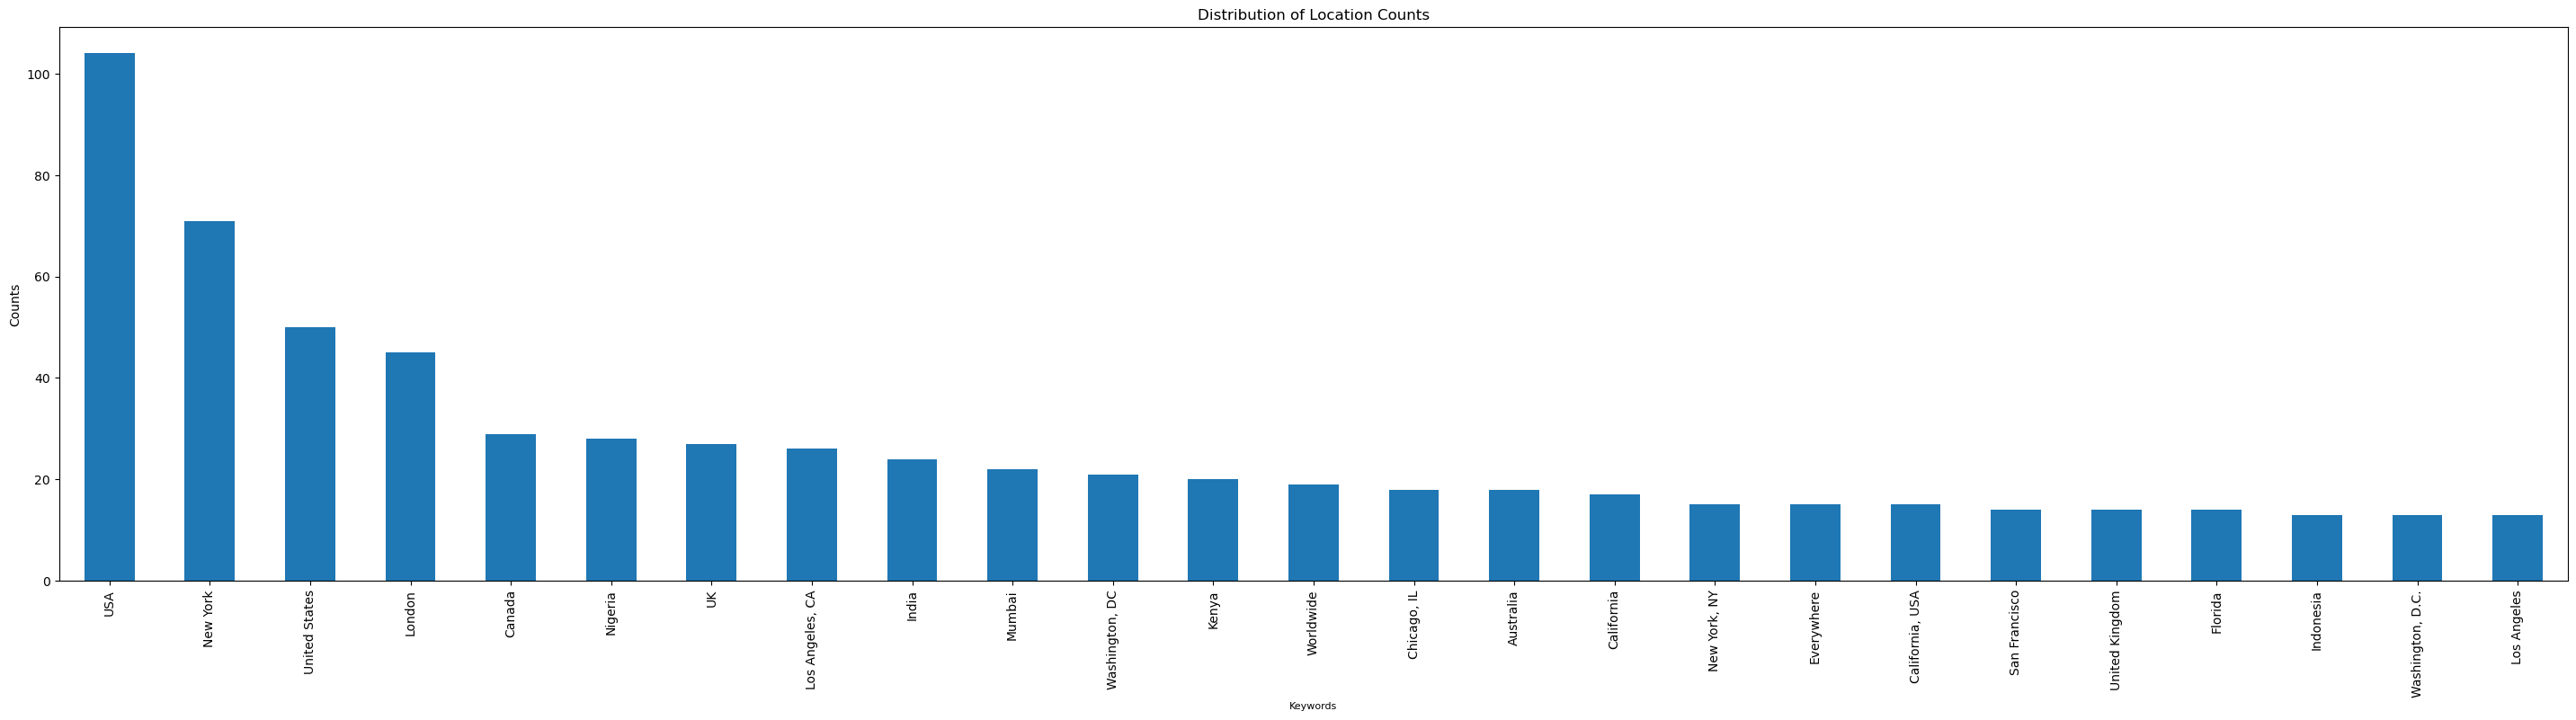

In [14]:
location_counts = train['location'].value_counts()[1:].head(25)
plt.figure(figsize=(36, 8))
location_counts.plot(kind='bar')
plt.title('Distribution of Location Counts')
plt.xlabel('Keywords', fontsize=8)
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [15]:
location_counts.tail()

location
United Kingdom      14
Florida             14
Indonesia           13
Washington, D.C.    13
Los Angeles         13
Name: count, dtype: int64

In [16]:
def remove_non_alpha(text):
    return re.sub(r'[^a-zA-Z0-9 ]', '', str(text))

In [17]:
train_cleaned = train.applymap(remove_non_alpha)

/var/folders/k4/3wpj54456bvgkt25bz8nl7sh0000gn/T/ipykernel_71240/3570783189.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_cleaned = train.applymap(remove_non_alpha)


In [18]:
train_cleaned

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this earthquake Ma...,1
1,4,,,Forest fire near La Ronge Sask Canada,1
2,5,,,All residents asked to shelter in place are be...,1
3,6,,,13000 people receive wildfires evacuation orde...,1
4,7,,,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,ariaahrary TheTawniest The out of control wild...,1
7610,10871,,,M194 0104 UTC5km S of Volcano Hawaii httptcozD...,1
7611,10872,,,Police investigating after an ebike collided w...,1


In [19]:
train_cleaned['fullText'] = train_cleaned['keyword'] + train_cleaned['location'] + train_cleaned['text']
train_cleaned

,id,keyword,location,text,target,fullText
0,1,,,Our Deeds are the Reason of this earthquake Ma...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,,,Forest fire near La Ronge Sask Canada,1,Forest fire near La Ronge Sask Canada
2,5,,,All residents asked to shelter in place are be...,1,All residents asked to shelter in place are be...
3,6,,,13000 people receive wildfires evacuation orde...,1,13000 people receive wildfires evacuation orde...
4,7,,,Just got sent this photo from Ruby Alaska as s...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,,,ariaahrary TheTawniest The out of control wild...,1,ariaahrary TheTawniest The out of control wild...
7610,10871,,,M194 0104 UTC5km S of Volcano Hawaii httptcozD...,1,M194 0104 UTC5km S of Volcano Hawaii httptcozD...
7611,10872,,,Police investigating after an ebike collided w...,1,Police investigating after an ebike collided w...


## Model Architecture (25 pts)

### Model Choice and Reasoning:
- We will use a Long Short-Term Memory (LSTM) network because LSTMs are well-suited for sequential data like text and can capture long-term dependencies.

### Text Representation:
- Using TF-IDF to convert text into numerical features, as it provides a good balance between importance and frequency of words.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(train_cleaned['fullText']).toarray()
y = train_cleaned['target'].astype(float)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (6090, 10000), y_train shape: (6090,)
X_val shape: (1523, 10000), y_val shape: (1523,)


In [22]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, SpatialDropout1D

X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_rnn = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Build Vanilla RNN model
model = Sequential()
model.add(SimpleRNN(128, input_shape=(1, X_train.shape[1]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │     1,296,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,641 (4.95 MB)

 Trainable params: 1,296,641 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    X_train_rnn, y_train, epochs=10, batch_size=256, validation_data=(X_val_rnn, y_val), verbose=2)


Epoch 1/10
24/24 - 2s - 85ms/step - accuracy: 0.6192 - loss: 0.6700 - val_accuracy: 0.6835 - val_loss: 0.6381
Epoch 2/10
24/24 - 1s - 25ms/step - accuracy: 0.7798 - loss: 0.5768 - val_accuracy: 0.7899 - val_loss: 0.5607
Epoch 3/10
24/24 - 1s - 24ms/step - accuracy: 0.8537 - loss: 0.4679 - val_accuracy: 0.7965 - val_loss: 0.5015
Epoch 4/10
24/24 - 1s - 26ms/step - accuracy: 0.8875 - loss: 0.3764 - val_accuracy: 0.7965 - val_loss: 0.4726
Epoch 5/10
24/24 - 1s - 25ms/step - accuracy: 0.9033 - loss: 0.3114 - val_accuracy: 0.7945 - val_loss: 0.4634
Epoch 6/10
24/24 - 1s - 25ms/step - accuracy: 0.9192 - loss: 0.2638 - val_accuracy: 0.7905 - val_loss: 0.4643
Epoch 7/10
24/24 - 1s - 24ms/step - accuracy: 0.9312 - loss: 0.2269 - val_accuracy: 0.7827 - val_loss: 0.4752
Epoch 8/10
24/24 - 1s - 26ms/step - accuracy: 0.9424 - loss: 0.1972 - val_accuracy: 0.7827 - val_loss: 0.4847
Epoch 9/10
24/24 - 1s - 25ms/step - accuracy: 0.9501 - loss: 0.1736 - val_accuracy: 0.7807 - val_loss: 0.4983
Epoch 10/1

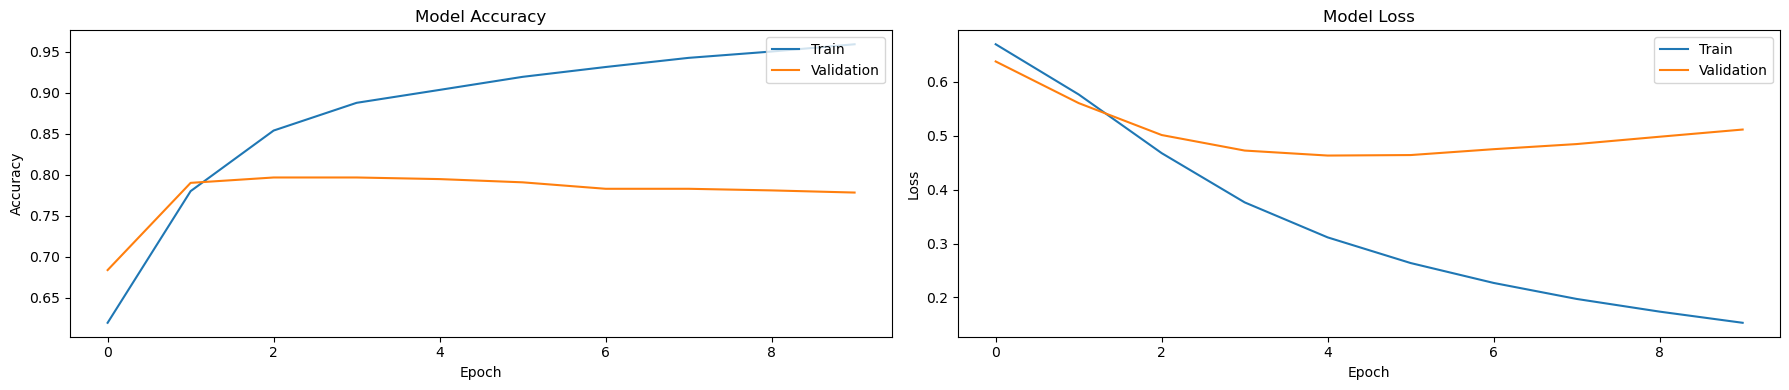

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

# Plot accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc='upper right')

# Plot loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (model.predict(X_val_rnn) > 0.5).astype('int32')
cm = confusion_matrix(y_val, y_pred)
# print(classification_report(y_val, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


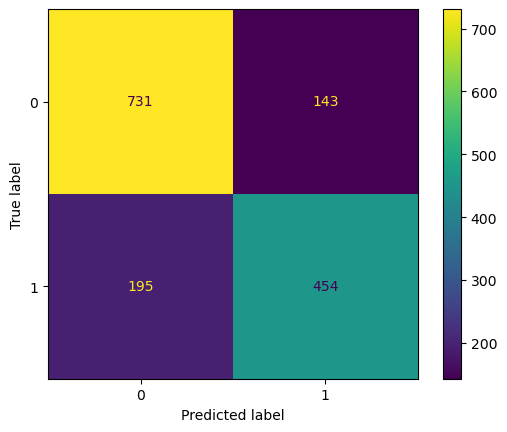

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Results and Analysis (35 pts)

In [27]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

def build_model(units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, input_shape=(1, X_train.shape[1]), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
best_accuracy = 0
best_params = {}

for units in [64, 128, 256]:
    for dropout_rate in [0.2, 0.3, 0.5]:
        print(f"Training model with {units} units and {dropout_rate} dropout rate")
        model = build_model(units, dropout_rate)
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=64, validation_data=(X_val_rnn, y_val), callbacks=[early_stopping], verbose=2)
        accuracy = max(history.history['val_accuracy'])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'units': units, 'dropout_rate': dropout_rate}

print(f'Best Params: {best_params}, Best Validation Accuracy: {best_accuracy}')

Training model with 64 units and 0.2 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 2s - 20ms/step - accuracy: 0.6652 - loss: 0.6422 - val_accuracy: 0.7800 - val_loss: 0.5757
Epoch 2/10
96/96 - 1s - 6ms/step - accuracy: 0.8366 - loss: 0.4718 - val_accuracy: 0.7919 - val_loss: 0.4815
Epoch 3/10
96/96 - 1s - 8ms/step - accuracy: 0.8816 - loss: 0.3475 - val_accuracy: 0.7892 - val_loss: 0.4629
Epoch 4/10
96/96 - 1s - 6ms/step - accuracy: 0.9056 - loss: 0.2733 - val_accuracy: 0.7853 - val_loss: 0.4702
Epoch 5/10
96/96 - 1s - 5ms/step - accuracy: 0.9259 - loss: 0.2207 - val_accuracy: 0.7833 - val_loss: 0.4874
Epoch 6/10
96/96 - 1s - 5ms/step - accuracy: 0.9415 - loss: 0.1823 - val_accuracy: 0.7741 - val_loss: 0.5099
Training model with 64 units and 0.3 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 2s - 18ms/step - accuracy: 0.6514 - loss: 0.6440 - val_accuracy: 0.7682 - val_loss: 0.5786
Epoch 2/10
96/96 - 1s - 5ms/step - accuracy: 0.8253 - loss: 0.4814 - val_accuracy: 0.7945 - val_loss: 0.4861
Epoch 3/10
96/96 - 1s - 5ms/step - accuracy: 0.8760 - loss: 0.3595 - val_accuracy: 0.7886 - val_loss: 0.4640
Epoch 4/10
96/96 - 1s - 5ms/step - accuracy: 0.9025 - loss: 0.2845 - val_accuracy: 0.7892 - val_loss: 0.4681
Epoch 5/10
96/96 - 1s - 5ms/step - accuracy: 0.9213 - loss: 0.2330 - val_accuracy: 0.7879 - val_loss: 0.4810
Epoch 6/10
96/96 - 1s - 6ms/step - accuracy: 0.9376 - loss: 0.1915 - val_accuracy: 0.7853 - val_loss: 0.5009
Training model with 64 units and 0.5 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 2s - 21ms/step - accuracy: 0.6291 - loss: 0.6559 - val_accuracy: 0.7597 - val_loss: 0.6014
Epoch 2/10
96/96 - 1s - 5ms/step - accuracy: 0.8163 - loss: 0.5151 - val_accuracy: 0.7866 - val_loss: 0.5015
Epoch 3/10
96/96 - 1s - 6ms/step - accuracy: 0.8589 - loss: 0.3935 - val_accuracy: 0.7919 - val_loss: 0.4664
Epoch 4/10
96/96 - 1s - 5ms/step - accuracy: 0.8851 - loss: 0.3212 - val_accuracy: 0.7925 - val_loss: 0.4612
Epoch 5/10
96/96 - 1s - 5ms/step - accuracy: 0.9046 - loss: 0.2715 - val_accuracy: 0.7833 - val_loss: 0.4700
Epoch 6/10
96/96 - 1s - 5ms/step - accuracy: 0.9212 - loss: 0.2309 - val_accuracy: 0.7859 - val_loss: 0.4801
Epoch 7/10
96/96 - 1s - 6ms/step - accuracy: 0.9337 - loss: 0.1976 - val_accuracy: 0.7820 - val_loss: 0.4986
Training model with 128 units and 0.2 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 3s - 30ms/step - accuracy: 0.6831 - loss: 0.6235 - val_accuracy: 0.7932 - val_loss: 0.5365
Epoch 2/10
96/96 - 2s - 17ms/step - accuracy: 0.8468 - loss: 0.4180 - val_accuracy: 0.7971 - val_loss: 0.4635
Epoch 3/10
96/96 - 2s - 18ms/step - accuracy: 0.8941 - loss: 0.2951 - val_accuracy: 0.7905 - val_loss: 0.4694
Epoch 4/10
96/96 - 2s - 17ms/step - accuracy: 0.9255 - loss: 0.2199 - val_accuracy: 0.7827 - val_loss: 0.4937
Epoch 5/10
96/96 - 2s - 17ms/step - accuracy: 0.9456 - loss: 0.1704 - val_accuracy: 0.7787 - val_loss: 0.5280
Training model with 128 units and 0.3 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 3s - 30ms/step - accuracy: 0.6719 - loss: 0.6316 - val_accuracy: 0.7879 - val_loss: 0.5449
Epoch 2/10
96/96 - 2s - 16ms/step - accuracy: 0.8396 - loss: 0.4328 - val_accuracy: 0.7997 - val_loss: 0.4634
Epoch 3/10
96/96 - 2s - 17ms/step - accuracy: 0.8908 - loss: 0.3068 - val_accuracy: 0.7866 - val_loss: 0.4630
Epoch 4/10
96/96 - 2s - 16ms/step - accuracy: 0.9190 - loss: 0.2333 - val_accuracy: 0.7840 - val_loss: 0.4850
Epoch 5/10
96/96 - 2s - 16ms/step - accuracy: 0.9402 - loss: 0.1845 - val_accuracy: 0.7807 - val_loss: 0.5136
Epoch 6/10
96/96 - 2s - 17ms/step - accuracy: 0.9552 - loss: 0.1460 - val_accuracy: 0.7768 - val_loss: 0.5474
Training model with 128 units and 0.5 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 3s - 31ms/step - accuracy: 0.6506 - loss: 0.6385 - val_accuracy: 0.7715 - val_loss: 0.5637
Epoch 2/10
96/96 - 2s - 16ms/step - accuracy: 0.8358 - loss: 0.4599 - val_accuracy: 0.7965 - val_loss: 0.4741
Epoch 3/10
96/96 - 2s - 16ms/step - accuracy: 0.8770 - loss: 0.3393 - val_accuracy: 0.7978 - val_loss: 0.4628
Epoch 4/10
96/96 - 2s - 16ms/step - accuracy: 0.9034 - loss: 0.2696 - val_accuracy: 0.7853 - val_loss: 0.4768
Epoch 5/10
96/96 - 2s - 16ms/step - accuracy: 0.9271 - loss: 0.2155 - val_accuracy: 0.7866 - val_loss: 0.4951
Epoch 6/10
96/96 - 2s - 16ms/step - accuracy: 0.9412 - loss: 0.1772 - val_accuracy: 0.7787 - val_loss: 0.5217
Training model with 256 units and 0.2 dropout rate


/Users/chenliyang1024/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
96/96 - 5s - 48ms/step - accuracy: 0.6906 - loss: 0.6014 - val_accuracy: 0.7932 - val_loss: 0.4988
Epoch 2/10
96/96 - 3s - 35ms/step - accuracy: 0.8612 - loss: 0.3696 - val_accuracy: 0.7925 - val_loss: 0.4666
Epoch 3/10


## Conclusion (15 pts)

In [ ]:
sample_submission = pd.read_csv("./nlp-getting-started/sample_submission.csv")
sample_submission.head()

In [ ]:
print('Test Set Shape = {}'.format(test.shape))
test['keyword'] = test['keyword'].fillna('')
test['location'] = test['location'].fillna('')

test_cleaned = test.applymap(remove_non_alpha)
test_cleaned['fullText'] = test_cleaned['keyword'] + test_cleaned['location'] + test_cleaned['text']
test_cleaned



In [ ]:
X_validation = vectorizer.fit_transform(test_cleaned['fullText']).toarray()
X_validation

In [ ]:
X_test_rnn = X_validation.reshape((X_validation.shape[0], 1, X_validation.shape[1]))
y_pred = np.argmax(model.predict(X_test_rnn), axis=1)


sample_submission['target'] = y_pred
sample_submission.to_csv("submission.csv", index=False)

In [ ]:
sample_submission.nunique()